In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install bs_ds
# !pip install fake_useragent
# !pip install lxml
# ! pip install scrapy
# ! pip install scrapy_user_agents
# ! ls ./drive/MyDrive/sharif/Spider
# ! pwd

In [ ]:
import os
import pandas as pd
import re
import glob

limit_number = 750

In [ ]:
os.chdir('./drive/MyDrive/sharif/FineTuning/ipython(guide)')
os.listdir()

['albert-fa-base-v2-clf-persiannews',
 'Copy of albert.ipynb',
 'bert-fa-base-uncased-clf-persiannews',
 'ParsBERT.ipynb',
 'bert-base-multilingual-cased',
 'bert-base-parsbert-uncased',
 'ParsBERT_pytorch_Dense_3.ipynb',
 'ParsBERT_pytorch_Dense_4.ipynb',
 'ParsBERT_pytorch_Dense_3_arch_2.ipynb',
 'bert-base-parsbert-uncased.ipynb',
 'ParsBERT_pytorch.ipynb',
 ' ParsBERT_pytorch_SGD.ipynb',
 'saved_weights_multi.pt',
 'multilingualBERT_pytorch.ipynb',
 'ParsBERT_pytorch_SGD_Dense_3_arch_2.ipynb',
 'step_by_step_1_Collecting_Preprocessing_FreqDist.ipynb',
 'ParsBert_preprocessing.ipynb',
 'ParsBERT_pytorch_balanced_300_words.ipynb',
 'saved_weights.pt',
 'ParsBERT_pytorch_balanced_600_words.ipynb']

In [ ]:
! pip install hazm
! pip install clean_text
! pip install ftfy
! pip install emoji

     |████████████████████████████████| 317kB 4.3MB/s 
     |████████████████████████████████| 1.4MB 29.7MB/s 
     |████████████████████████████████| 235kB 46.4MB/s 
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394473 sha256=7e21fc338d2383c29bd2ed630b54db4ad6015a7b8688c0dc23b60807ac177626
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154560 sha256=2d22794023c096a36b5d8a4cc66e681beea1a6722171852df91970f155353413
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
Successfully built nltk libwapiti
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 71kB 2.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-c

In [ ]:
import os
import pandas as pd
import glob

import hazm
from cleantext import clean

import plotly.express as px
import plotly.graph_objects as go
from tqdm.notebook import tqdm

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


## Preprocessing

In [ ]:
data = pd.read_csv('../Data/unpreprocessed_dataset.csv')

In [ ]:
data['comment_len_by_words'] = data['body'].apply(lambda t: len(hazm.word_tokenize(t)))

In [ ]:
min_max_len = data["comment_len_by_words"].min(), data["comment_len_by_words"].max()
print(f'Min: {min_max_len[0]} \tMax: {min_max_len[1]}')

Min: 0 	Max: 27462


#### Finding normal number of words in text

In [ ]:
def data_gl_than(data, less_than=100.0, greater_than=0.0, col='comment_len_by_words'):
    data_length = data[col].values

    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])

    data_glt_rate = (data_glt / len(data_length)) * 100

    print(f'Texts with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole! means {data_glt}')

In [ ]:
for i in range(15):
  data_gl_than(data, 100*i, 0)

Texts with word length of greater than 0 and less than 0 includes 0.00% of the whole! means 0
Texts with word length of greater than 0 and less than 100 includes 7.11% of the whole! means 2536
Texts with word length of greater than 0 and less than 200 includes 16.20% of the whole! means 5777
Texts with word length of greater than 0 and less than 300 includes 24.68% of the whole! means 8804
Texts with word length of greater than 0 and less than 400 includes 33.52% of the whole! means 11956
Texts with word length of greater than 0 and less than 500 includes 42.27% of the whole! means 15075
Texts with word length of greater than 0 and less than 600 includes 49.83% of the whole! means 17772
Texts with word length of greater than 0 and less than 700 includes 56.46% of the whole! means 20138
Texts with word length of greater than 0 and less than 800 includes 62.67% of the whole! means 22351
Texts with word length of greater than 0 and less than 900 includes 68.09% of the whole! means 24287
T

In [ ]:
for i in range(15):
  data_gl_than(data, 600, 50*i)

Texts with word length of greater than 0 and less than 600 includes 49.83% of the whole! means 17772
Texts with word length of greater than 50 and less than 600 includes 48.49% of the whole! means 17295
Texts with word length of greater than 100 and less than 600 includes 42.72% of the whole! means 15236
Texts with word length of greater than 150 and less than 600 includes 37.81% of the whole! means 13484
Texts with word length of greater than 200 and less than 600 includes 33.63% of the whole! means 11995
Texts with word length of greater than 250 and less than 600 includes 29.37% of the whole! means 10475
Texts with word length of greater than 300 and less than 600 includes 25.14% of the whole! means 8968
Texts with word length of greater than 350 and less than 600 includes 20.74% of the whole! means 7396
Texts with word length of greater than 400 and less than 600 includes 16.31% of the whole! means 5816
Texts with word length of greater than 450 and less than 600 includes 11.83% of

In [ ]:
min_lenght , max_lenght = 50 , 600

In [ ]:
# remove if less than min length or more than max length
data['comment_len_by_words'] = data['comment_len_by_words'].apply(lambda t_length: t_length if max_lenght>t_length>min_lenght else None)
print('lengh of data before dropout', str(len(data)))
data = data.dropna(subset=['comment_len_by_words'])
data = data.reset_index(drop=True)
print('lengh of data after dropout', str(len(data)))

lengh of data before dropout 35667
lengh of data after dropout 17258


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=data['comment_len_by_words']
))

fig.update_layout(
    title_text='Distribution of word counts within comments',
    xaxis_title_text='Word Count',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download()

In [ ]:

def cleaning(text):
    text = text.strip()
    
    # regular cleaning
    text = clean(text)

    
    # normalizing
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)
    
    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)
    
    text = wierd_pattern.sub(r'', text)
    
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    
    return text



In [ ]:
data['cleaned_body'] = data['body'].apply(cleaning)
data['cleaned_body_len_by_words'] = data['cleaned_body'].apply(lambda t: len(hazm.word_tokenize(t)))

In [ ]:
data = data.dropna(subset=['cleaned_body'])

In [ ]:
# remove if less than min length or more than max length
data['cleaned_body_len_by_words'] = data['cleaned_body_len_by_words'].apply(lambda t_length: t_length if max_lenght>t_length>min_lenght else None)
print('lengh of data before dropout', str(len(data)))
data = data.dropna(subset=['cleaned_body_len_by_words'])
data = data.reset_index(drop=True)
print('lengh of data after dropout', str(len(data)))

lengh of data before dropout 17258
lengh of data after dropout 17135


In [ ]:
data.head()


,body,tag,comment_len_by_words,cleaned_body,cleaned_body_len_by_words
0,چنانچه افرادی را می‌شناسید که جزو توسعه‌دهندگا...,'' برنامه نویسی اندروید'',258.0,چنانچه افرادی را می‌شناسید که جزو توسعه‌دهندگا...,250.0
1,Microsoft Research Open Data یک ریپازیتوری مبت...,'' داده کاوی'',423.0,Microsoft Research Open Data یک ریپازیتوری مبت...,425.0
2,Google Alerts این امکان را برای کاربران فراهم ...,'' تکنولوژی'',321.0,Google Alerts این امکان را برای کاربران فراهم ...,322.0
3,فیسبوک برای آنکه فرآیند ساخت اپلیکیشن در جاوا ...,'' جاوا اسکریپت'',454.0,فیسبوک برای آنکه فرآیند ساخت اپلیکیشن در جاوا ...,456.0
4,با وجود اینکه گوگل از زبان‌های Java و Kotlin ب...,'' کاتلین'',388.0,با وجود اینکه گوگل از زبان‌های Java و Kotlin ب...,398.0


#### Handling unbalanced data


In [ ]:
# counter
count_data = data.copy()
count_data = count_data.dropna().reset_index(drop=True)
count = {}
tags_list = pd.read_excel('../Tags.xlsx',header = None)
tags_list.columns = ['tag']
for _,tag in tags_list.iterrows():
  if tag['tag']!='ویرگول' and tag['tag']!=None and tag['tag']!='':
    count[re.sub(' ','',tag['tag'].lower())] = 0

for indx,d in count_data.iterrows():
  tags = re.sub('\'|\[|\]','',d['tag']).split(',')
  
  for tag in tags:
    if tag.strip().lower() in tags_list.values:
      count[tag.strip().lower().replace(' ','')]+=1 
# count

In [ ]:
def count_gl_than(count, less_than=100.0, greater_than=0.0):
    sum_count = sum([count[k] for k in list(count.keys())])

    count_glt = sum([count[k] for k in list(count.keys()) if greater_than < count[k] <= less_than])

    count_glt_rate = (count_glt / sum_count) * 100

    print(f'Tags with count of greater than {greater_than} and less than {less_than} includes {count_glt_rate:.2f}% of the whole! means {count_glt}')

In [ ]:
for i in range(20):
  count_gl_than(count, 50*i, 0)

Tags with count of greater than 0 and less than 0 includes 0.00% of the whole! means 0
Tags with count of greater than 0 and less than 50 includes 1.11% of the whole! means 283
Tags with count of greater than 0 and less than 100 includes 6.12% of the whole! means 1557
Tags with count of greater than 0 and less than 150 includes 9.26% of the whole! means 2356
Tags with count of greater than 0 and less than 200 includes 13.33% of the whole! means 3392
Tags with count of greater than 0 and less than 250 includes 18.47% of the whole! means 4698
Tags with count of greater than 0 and less than 300 includes 27.16% of the whole! means 6909
Tags with count of greater than 0 and less than 350 includes 32.31% of the whole! means 8219
Tags with count of greater than 0 and less than 400 includes 35.27% of the whole! means 8972
Tags with count of greater than 0 and less than 450 includes 41.98% of the whole! means 10679
Tags with count of greater than 0 and less than 500 includes 43.78% of the whole

(array([46., 19.,  5.,  1.,  2.,  1.,  2.,  1.,  0.,  1.]),
 array([  16. ,  251.9,  487.8,  723.7,  959.6, 1195.5, 1431.4, 1667.3,
        1903.2, 2139.1, 2375. ]),
 <a list of 10 Patch objects>)

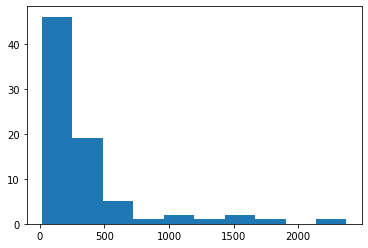

In [ ]:
import  matplotlib.pyplot as plt
plt.hist([count[k] for k in list(count.keys())])

In [ ]:
limit_number = 500

In [ ]:
for i in range(len(data)):

    text=data.loc[i,"body"]
    tags = data.loc[i,'tag']
    data.loc[i,'tag'] = re.sub('ویرگول|c\+\+','',tags.lower())
    tags = re.sub('\[|\]|\'|=|ویرگول',' ',tags)
    tags_list = [t.strip() for t  in tags.split(',') if (t!=' ' and t!='' and (re.sub('[ ]*','',t) in list(count.keys())))]

    # balancing
    if len(tags_list) <1:
      data.loc[i,"body"]=None
      continue
    min_count = min([count[tag.replace(' ','')] for tag in tags_list if (tag.replace(' ','') in list(count.keys()))])

    if min_count<limit_number :

      replications = (limit_number - min_count)//min_count

      d_temp = data.iloc[i,:].copy()
      for _ in range(replications):

        data = data.append(d_temp)
        for tag in tags_list:
          count[tag.replace(' ','')] += 1
    
    for tag in tags_list:
        if count[tag.replace(' ','')]>limit_number:
          for t in tags_list:
            count[t.replace(' ','')] -=1
          data.loc[i,"body"]=None

    if i%500==0:
      print("Record: up to "+str(i)+" from " ,str(len(data)),"is processed.")

Record: up to 0 from  17137 is processed.
Record: up to 500 from  18176 is processed.
Record: up to 1000 from  18571 is processed.
Record: up to 2000 from  18944 is processed.
Record: up to 2500 from  19092 is processed.
Record: up to 3000 from  19212 is processed.
Record: up to 3500 from  19352 is processed.
Record: up to 4000 from  19474 is processed.
Record: up to 4500 from  19594 is processed.
Record: up to 5000 from  19711 is processed.
Record: up to 5500 from  19812 is processed.
Record: up to 6000 from  19904 is processed.
Record: up to 6500 from  20018 is processed.
Record: up to 7000 from  20117 is processed.
Record: up to 7500 from  20195 is processed.
Record: up to 8000 from  20269 is processed.
Record: up to 8500 from  20365 is processed.
Record: up to 9000 from  20446 is processed.
Record: up to 9500 from  20531 is processed.
Record: up to 10000 from  20593 is processed.
Record: up to 10500 from  20664 is processed.
Record: up to 11000 from  20738 is processed.
Record: up 

In [ ]:
data = data.dropna().reset_index(drop=True)
data.head()

,body,tag,comment_len_by_words,cleaned_body,cleaned_body_len_by_words
0,چنانچه افرادی را می‌شناسید که جزو توسعه‌دهندگا...,'' برنامه نویسی اندروید'',258.0,چنانچه افرادی را می‌شناسید که جزو توسعه‌دهندگا...,250.0
1,Microsoft Research Open Data یک ریپازیتوری مبت...,'' داده کاوی'',423.0,Microsoft Research Open Data یک ریپازیتوری مبت...,425.0
2,Google Alerts این امکان را برای کاربران فراهم ...,'' تکنولوژی'',321.0,Google Alerts این امکان را برای کاربران فراهم ...,322.0
3,فیسبوک برای آنکه فرآیند ساخت اپلیکیشن در جاوا ...,'' جاوا اسکریپت'',454.0,فیسبوک برای آنکه فرآیند ساخت اپلیکیشن در جاوا ...,456.0
4,با وجود اینکه گوگل از زبان‌های Java و Kotlin ب...,'' کاتلین'',388.0,با وجود اینکه گوگل از زبان‌های Java و Kotlin ب...,398.0


In [ ]:
data.loc[:,['body','tag']]

,body,tag
0,چنانچه افرادی را می‌شناسید که جزو توسعه‌دهندگا...,'' برنامه نویسی اندروید''
1,Microsoft Research Open Data یک ریپازیتوری مبت...,'' داده کاوی''
2,Google Alerts این امکان را برای کاربران فراهم ...,'' تکنولوژی''
3,فیسبوک برای آنکه فرآیند ساخت اپلیکیشن در جاوا ...,'' جاوا اسکریپت''
4,با وجود اینکه گوگل از زبان‌های Java و Kotlin ب...,'' کاتلین''
...,...,...
14210,React Native نسخه 0.63 RC0 به تازگی منتشر شده ...,"''جاوا اسکریپت ', 'ری اکت ''"
14211,تقلب‌نامه (Cheat Sheet)، متنی کوتاه اما جامع پ...,''یادگیری عمیق ''
14212,تقلب‌نامه (Cheat Sheet)، متنی کوتاه اما جامع پ...,''یادگیری عمیق ''
14213,در این مقاله به بررسی مبانی تشخیص چهره با فلات...,''فلاتر ''


In [ ]:
data.loc[:,['body','tag']].to_csv("../Data/ParsBert_1_no_limitation.csv", index=False)

In [1]:
# counter
count_data = data.copy()
count_data = count_data.dropna().reset_index(drop=True)
count = {}
tags_list = pd.read_excel('../Tags.xlsx',header = None)
tags_list.columns = ['tag']
for _,tag in tags_list.iterrows():
  if tag['tag']!='ویرگول' and tag['tag']!=None and tag['tag']!='':
    count[re.sub(' ','',tag['tag'].lower())] = 0

for indx,d in count_data.iterrows():
  tags = re.sub('\'|\[|\]','',d['tag']).split(',')
  
  for tag in tags:
    if tag.strip().lower() in tags_list.values:
      count[tag.strip().lower().replace(' ','')]+=1 
count

NameError: ignored

(array([18., 15., 15., 15.,  3.,  2.,  3.,  2.,  2.,  3.]),
 array([102. , 146.7, 191.4, 236.1, 280.8, 325.5, 370.2, 414.9, 459.6,
        504.3, 549. ]),
 <a list of 10 Patch objects>)

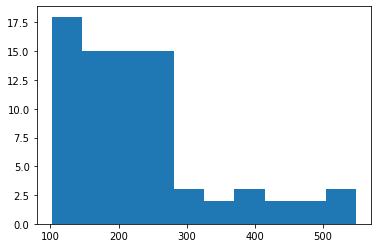

In [ ]:
plt.hist([count[k] for k in list(count.keys())])